In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 

In [2]:
df=pd.read_excel("D:/Journal paper work/Serbia_data_new/spring.xlsx")

In [3]:
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
0,2010-03-01 00:00:00,2010,3,1,0,0.0053,3.724,0.0000,0.0000,0.0,0.1073,0.9147,1.1957,2010-3-1,60,-0.144752,-3.141593,143.507105
1,2010-03-01 01:00:00,2010,3,1,1,0.0430,3.805,0.0000,0.0000,0.0,0.1051,0.9359,1.1948,2010-3-1,60,-0.144752,-2.879793,141.260565
2,2010-03-01 02:00:00,2010,3,1,2,0.1916,3.894,0.0000,0.0000,0.0,0.1033,0.9542,1.1936,2010-3-1,60,-0.144752,-2.617994,135.221780
3,2010-03-01 03:00:00,2010,3,1,3,0.2183,3.951,0.0000,0.0000,0.0,0.1018,0.9520,1.1939,2010-3-1,60,-0.144752,-2.356194,126.743089
4,2010-03-01 04:00:00,2010,3,1,4,0.2174,4.008,0.0008,0.0047,0.0,0.1003,0.9503,1.1947,2010-3-1,60,-0.144752,-2.094395,116.921813


In [5]:
lower_limit = 4
upper_limit = 16
df = df[(df['Hour'] >= lower_limit) & (df['Hour'] <= upper_limit)]

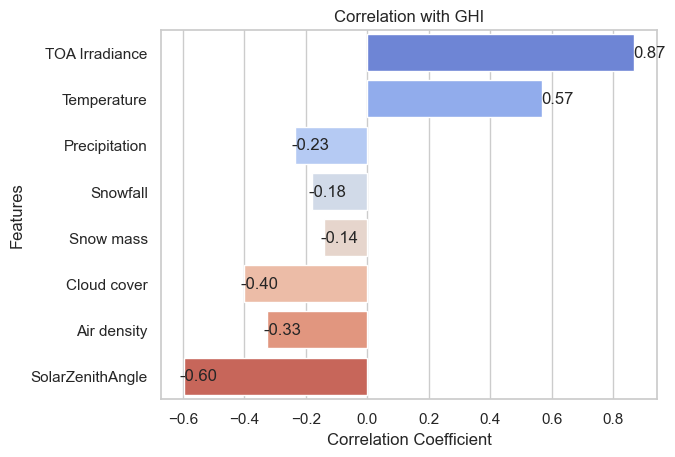

In [6]:
from sklearn import preprocessing

selected_feature = 'GHI'
selected_features = ['TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
selected_data = df[selected_features + [selected_feature]].values

scaler = preprocessing.StandardScaler().fit(selected_data)
selected_data = scaler.transform(selected_data)
corr_coef = np.corrcoef(selected_data.T)
corr_with_selected_feature = corr_coef[-1, :-1]


corr_data = pd.DataFrame({'Selected Feature': selected_features, 'Correlation Coefficient': corr_with_selected_feature})
sns.set(style='whitegrid')
ax = sns.barplot(x='Correlation Coefficient', y='Selected Feature', data=corr_data, palette='coolwarm')


ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Features')
ax.set_title(f'Correlation with {selected_feature}')

for i, corr in enumerate(corr_with_selected_feature):
    ax.text(corr + 0.05, i, f'{corr:.2f}', ha='center', va='center')

plt.show()

In [7]:
max_value1 = df['GHI'].max()
min_value1 = df['GHI'].min()

max_value2 = df['Temperature'].max()
min_value2 = df['Temperature'].min()

max_value3 = df['Cloud cover'].max()
min_value3 = df['Cloud cover'].min()

max_value4 = df['TOA Irradiance'].max()
min_value4 = df['TOA Irradiance'].min()

max_value5 = df['Air density'].max()
min_value5 = df['Air density'].min()

max_value6 = df['SolarZenithAngle'].max()
min_value6 = df['SolarZenithAngle'].min()

print("GHI(max):", max_value1)
print("GHI(min):", min_value1)

print("Temp(max):", max_value2)
print("Temp(min):", min_value2)

print("Cloud cover(max):", max_value3)
print("Cloud cover(min):", min_value3)

print("TOA Irradiance(max):", max_value4)
print("TOA Irradiance(min):", min_value4)

print("Air density(max):", max_value5)
print("Air density(min):", min_value5)

print("SolarZenithAngle(max):", max_value6)
print("SolarZenithAngle(min):", min_value6)

GHI(max): 936.0038
GHI(min): 0.0003
Temp(max): 28.038
Temp(min): -13.934
Cloud cover(max): 0.9969
Cloud cover(min): 0.0
TOA Irradiance(max): 1165.0212
TOA Irradiance(min): 0.0032
Air density(max): 1.2909
Air density(min): 1.1212
SolarZenithAngle(max): 116.9218131380356
SolarZenithAngle(min): 29.88571254412536


In [8]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['GHI','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

C:\Users\suraj\AppData\Local\Temp\ipykernel_24664\1985045023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
4,2010-03-01 04:00:00,2010,3,1,4,0.106699,0.427475,5.341860e-07,0.000001,0.0,0.004622,0.953255,0.433117,2010-3-1,60,-0.144752,-2.094395,1.000000
5,2010-03-01 05:00:00,2010,3,1,5,0.127755,0.434885,2.200793e-02,0.083315,0.0,0.004553,0.930083,0.439010,2010-3-1,60,-0.144752,-1.832596,0.879829
6,2010-03-01 06:00:00,2010,3,1,6,0.184834,0.464643,8.070557e-02,0.286609,0.0,0.004428,0.951550,0.439599,2010-3-1,60,-0.144752,-1.570796,0.757693
7,2010-03-01 07:00:00,2010,3,1,7,0.228859,0.487897,1.095621e-01,0.465141,0.0,0.004226,0.987261,0.430171,2010-3-1,60,-0.144752,-1.308997,0.637860
8,2010-03-01 08:00:00,2010,3,1,8,0.181890,0.509983,1.303357e-01,0.604326,0.0,0.003981,0.991574,0.417796,2010-3-1,60,-0.144752,-1.047198,0.524657


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
X=df[['Hour','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']]
y=df[['GHI']]

In [11]:
split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

max_value = 936.0038
min_value = 0
original_rmse = rmse_rf * (max_value - min_value) + min_value
original_mae = mae_rf * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_rf)

C:\Users\suraj\AppData\Local\Temp\ipykernel_24664\2915531898.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RMSE: 37.8737347069539
MAE: 24.636485789834918
R-squared: 0.9771570426087341


In [12]:
y_test = np.squeeze(y_test)
max_val = 936.0038
min_val = 0
y_test_actual = y_test * (max_val - min_val) + min_val
y_pred_actual = y_pred * (max_val - min_val) + min_val
y_test_actual = np.round(y_test_actual, 3)
y_pred_actual = np.round(y_pred_actual, 3)

cross_checking = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
print(cross_checking.head(20))

        Actual  Predicted
11861   56.172     44.617
11862  210.567    199.336
11863  374.042    341.950
11864  505.880    472.333
11865  599.587    561.897
11866  625.298    597.766
11867  575.307    480.105
11868  447.658    374.762
11869  290.722    276.222
11870  156.909    158.974
11871   52.537     61.649
11872    1.791      2.040
11884    0.222      0.147
11885   50.433     37.217
11886  180.571    157.335
11887  308.717    329.692
11888  405.299    370.281
11889  449.904    476.114
11890  443.840    487.014
11891  389.552    377.091


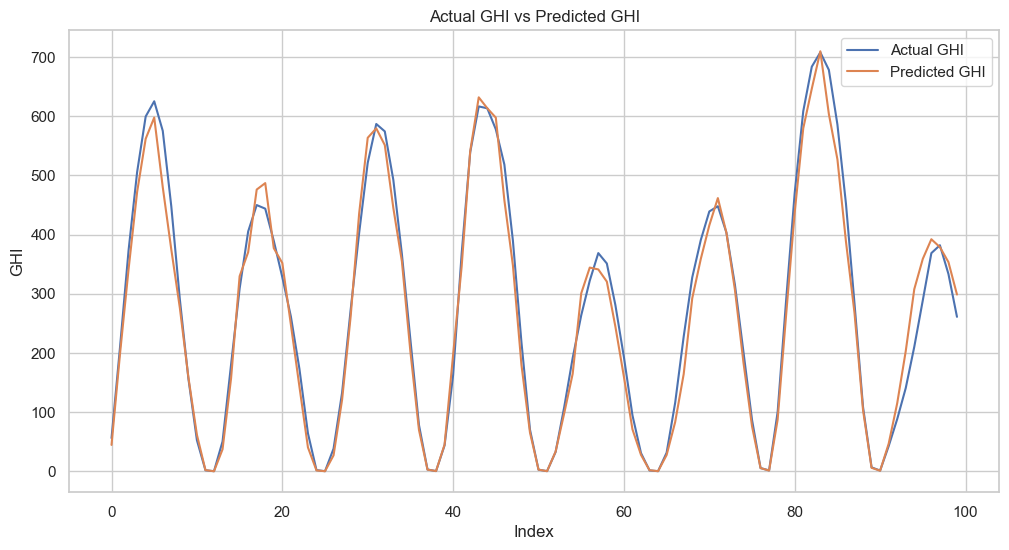

In [13]:
num_values = 100 
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(num_values), cross_checking['Actual'][:num_values], label='Actual GHI')
plt.plot(range(num_values), cross_checking['Predicted'][:num_values], label='Predicted GHI')

plt.xlabel('Index')
plt.ylabel('GHI')
plt.title('Actual GHI vs Predicted GHI')

plt.legend()
plt.show()

In [14]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)


max_value = 936.0038
min_value = 0
original_rmse = rmse_svr * (max_value - min_value) + min_value
original_mae = mae_svr * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_svr)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 56.651125190965686
MAE: 44.10202325054765
R-squared: 0.948891498877094


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


max_value = 936.0038
min_value = 0
original_rmse = rmse_knn * (max_value - min_value) + min_value
original_mae = mae_knn * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_knn)

RMSE: 48.17573263135023
MAE: 33.18595713508098
R-squared: 0.9630399355413418


In [16]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(40, 40, 40, 40, 40), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

max_value = 936.0038
min_value = 0
original_rmse = rmse_ann * (max_value - min_value) + min_value
original_mae = mae_ann * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_ann)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 47.11732132881313
MAE: 33.267589090614116
R-squared: 0.9646461065349773
